# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [2]:
dataset_path = '/kaggle/input/global-health-statistics/Global Health Statistics.csv'

# Read the dataset into a DataFrame

In [ ]:
df = pd.read_csv(dataset_path)

# Display the first few rows to understand the structure of the dataset
df.head()

# Basic dataset information
df.info()

# Checking for missing values
df.isnull().sum()

# Summary statistics for numeric columns
df.describe()

# Checking for duplicate rows
df.duplicated().sum()

In [ ]:
df.head()

# Data Preprocessing

In [ ]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Disease Name'] = le.fit_transform(df['Disease Name'])
df['Disease Category'] = le.fit_transform(df['Disease Category'])
df['Age Group'] = le.fit_transform(df['Age Group'])
df['Gender'] = le.fit_transform(df['Gender'])

# Visualizing the distribution of diseases globally

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease Name')
plt.title('Distribution of Diseases in the Global Health Dataset')
plt.xticks(rotation=90)
plt.show()

# Analyzing Prevalence, Mortality, and Recovery Rates by Disease Category

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Prevalence Rate (%)', data=df)
plt.title('Prevalence Rate by Disease Category')
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Mortality Rate (%)', data=df)
plt.title('Mortality Rate by Disease Category')
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Disease Category', y='Recovery Rate (%)', data=df)
plt.title('Recovery Rate by Disease Category')
plt.show()

In [ ]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators')
plt.show()

# Exploring Healthcare Access vs Population Affected

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthcare Access (%)', y='Population Affected', data=df, hue='Disease Category', palette='Set1')
plt.title('Healthcare Access vs Population Affected')
plt.show()

# Disease prevalence by continent (based on hypothetical region grouping)

In [ ]:
df['Region'] = np.where(df['Country'] < 10, 'Asia', 
                        np.where(df['Country'] < 20, 'North America', 
                                 np.where(df['Country'] < 30, 'Africa', 
                                          np.where(df['Country'] < 40, 'Europe', 'Other'))))

# Grouping and plotting disease prevalence by region

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Prevalence Rate (%)', data=df)
plt.title('Disease Prevalence by Region')
plt.show()

# Top 5 countries with highest healthcare access

In [ ]:
top_5_countries = df.groupby('Country')['Healthcare Access (%)'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Highest Healthcare Access')
plt.xlabel('Country')
plt.ylabel('Healthcare Access (%)')
plt.show()

# Average treatment cost by disease category

In [ ]:
avg_treatment_cost = df.groupby('Disease Category')['Average Treatment Cost (USD)'].mean()
plt.figure(figsize=(12, 6))
avg_treatment_cost.plot(kind='bar', color='lightgreen')
plt.title('Average Treatment Cost by Disease Category')
plt.xlabel('Disease Category')
plt.ylabel('Average Treatment Cost (USD)')
plt.show()

# Identifying the relationship between income and healthcare access

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Per Capita Income (USD)', y='Healthcare Access (%)', data=df, hue='Region', palette='Set2')
plt.title('Per Capita Income vs Healthcare Access')
plt.show()

## my extension
Simplify one disease one year

In [3]:
df = pd.read_csv(dataset_path)

In [ ]:
df

In [ ]:
td=df.loc[(df['Disease Name']=='Malaria')
& (df['Disease Category']=='Bacterial')]

In [ ]:
td

In [ ]:
td.columns

In [ ]:
td1=td.iloc[:,0:10]

td1['Prevalent Cases']=td1['Prevalence Rate (%)']*td1['Population Affected']/100
td1['Incident Cases']=td1['Incidence Rate (%)']*td1['Population Affected']/100
td1['Deaths']=td1['Mortality Rate (%)']*td1['Population Affected']/100

In [ ]:
aggregated_df = td1.groupby(['Year', 'Country'], as_index=False)['Incident Cases'].sum()


In [ ]:
td1

In [ ]:
pivot_df = aggregated_df.pivot(index='Year', columns='Country', values='Incident Cases')

# Plot the data
plt.figure(figsize=(12, 6))
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.title(f"Evolution of {disease_name} in All Countries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cases", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
a=td1.groupby(['Country','Year','Gender'])

In [ ]:
m=a[['Population Affected','Prevalent Cases','Incident Cases','Deaths']]

In [ ]:
m

In [ ]:
a['Prevalent Cases'].sum()/a['Population Affected'].sum()*100

In [ ]:
a['Incident Cases'].plot()

In [ ]:
td[td['Country']=='USA'].sort_values(by=['Year','Age Group'])

In [4]:
# make function to calculate rate
def prev_rate(disease,dicat):
    td=df.loc[(df['Disease Name']==disease)
    & (df['Disease Category']==dicat)]

    td1=td.iloc[:,0:10]

    td1['Prevalent Cases']=td1['Prevalence Rate (%)']*td1['Population Affected']/100
    td1['Incident Cases']=td1['Incidence Rate (%)']*td1['Population Affected']/100
    td1['Deaths']=td1['Mortality Rate (%)']*td1['Population Affected']/100

    aggregated_df = td1.groupby(['Year', 'Country'], as_index=False)['Incident Cases'].sum()

    pivot_df = aggregated_df.pivot(index='Year', columns='Country', values='Incident Cases')

# Plot the data
    plt.figure(figsize=(12, 6))
    for country in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[country], label=country)
    
    plt.title(f"Evolution of {disease} in All Countries", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Cases", fontsize=12)
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
!pip install ipywidgets

In [7]:
import ipywidgets as widgets

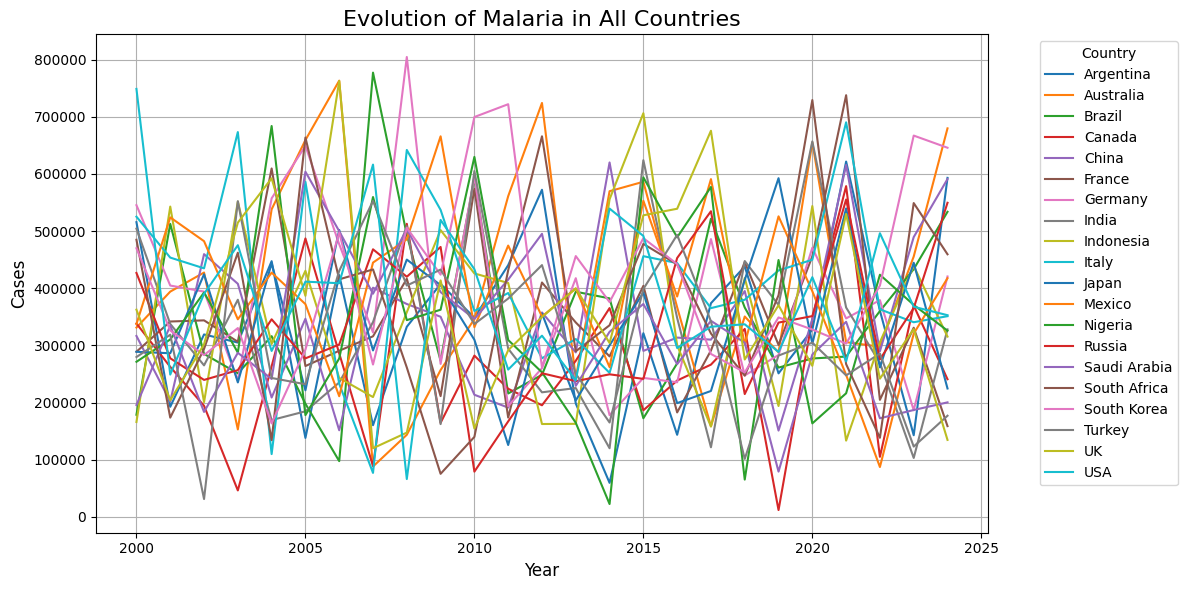

In [13]:
prev_rate('Malaria','Bacterial')

In [10]:
sex_widget = widgets.Dropdown(options=['Maleria', 'FEMALE'], description='Sex:')
island_widget = widgets.Dropdown(options=['Bacterial', 'Dream', 'Torgersen'], description='Island:')

In [12]:
widgets.interact(prev_rate, disease=sex_widget, dicat=island_widget)

interactive(children=(Dropdown(description='Sex:', options=('Maleria', 'FEMALE'), value='Maleria'), Dropdown(d…

<function __main__.prev_rate(disease, dicat)>